# Election Data Project - Polls and Donors
In this Data Project we will be looking at data from the 2016 election.
In this project we will analyze two datasets. The first data set will be the results of political polls. We will analyze this aggregated poll data and answer some questions:
1.) Who was being polled and what was their party affiliation?
2.) Did the poll results favor Clinton or Trump?
3.) How do undecided voters effect the poll?
4.) Can we account for the undecided voters?
5.) How did voter sentiment change over time?
6.) Can we see an effect in the polls from the debates?
We'll discuss the second data set later on!

In [1]:
# For data
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from __future__ import division

The data for the polls will be obtained from HuffPost Pollster.

In [2]:
# Use to grab data from the web(HTTP capabilities)
import requests

# We'll also use StringIO to work with the csv file, the DataFrame will require a .read() method
from StringIO import StringIO

Now that we have our data, we can set it as a DataFrame.

In [3]:
# This is the url link for the poll data in csv form
url = "http://elections.huffingtonpost.com/pollster/2016-general-election-trump-vs-clinton.csv"

# Use requests to get the information in text form
source1 = requests.get(url).text

# Use StringIO to avoid an IO error with pandas
poll_data1 = StringIO(source1)

In [4]:
# Set poll data as pandas DataFrame
poll_df1 = pd.read_csv(poll_data1)

# Let's get a glimpse at the data
poll_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 17 columns):
Pollster                  1522 non-null object
Start Date                1522 non-null object
End Date                  1522 non-null object
Entry Date/Time (ET)      1522 non-null object
Number of Observations    1013 non-null float64
Population                1522 non-null object
Mode                      1522 non-null object
Trump                     1522 non-null float64
Clinton                   1522 non-null float64
Other                     1098 non-null float64
Undecided                 1460 non-null float64
Pollster URL              1522 non-null object
Source URL                1522 non-null object
Partisan                  1522 non-null object
Affiliation               1522 non-null object
Question Text             661 non-null object
Question Iteration        1522 non-null int64
dtypes: float64(5), int64(1), object(11)
memory usage: 202.2+ KB


In [5]:
poll_df1.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


Let's go ahead and get a quick visualization overview of the affiliation for the polls.

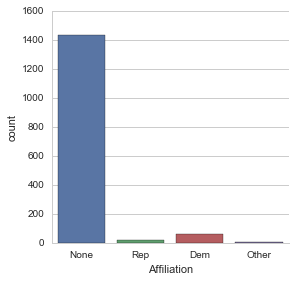

In [6]:
sns.factorplot('Affiliation',data=poll_df1,kind='count')

Looks like we are overall relatively neutral, but still leaning towards Democratic Affiliation, it will be good to keep this in mind. Let's see if sorting by the Population hue gives us any further insight into the data.

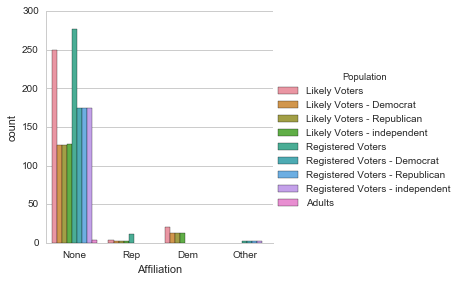

In [7]:
sns.factorplot('Affiliation',data=poll_df1,kind='count',hue='Population')

Looks like we have a strong showing of likely voters and Registered Voters, so the poll data should hopefully be a good reflection on the populations polled. Let's take another quick overview of the DataFrame.

Let's go ahead and take a look at the averages for Clinton, Trump , and the polled people who remained undecided.

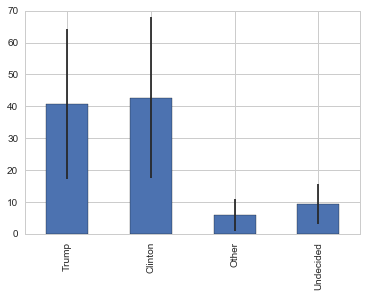

In [8]:
# First we'll get the average
avg = pd.DataFrame(poll_df1.mean())
avg.drop(['Number of Observations','Question Iteration'],axis=0,inplace=True)

# After that let's get the error
std = pd.DataFrame(poll_df1.std())
std.drop(['Number of Observations','Question Iteration'],axis=0,inplace=True)

avg.plot(yerr=std,kind='bar',legend=False)

Interesting to see how close these polls seem to be, especially considering the undecided factor. Let's take a look at the numbers.

In [9]:
poll_avg = pd.concat([avg,std],axis=1)
poll_avg.columns = ['average','std']
poll_avg

,average,std
Trump,40.643890,23.566390
Clinton,42.733903,25.298731
Other,5.806011,5.009533
Undecided,9.315068,6.253118


Looks like the polls indicate it as a fairly close race, but what about the undecided voters? Most of them will likely vote for one of the candidates once the election occurs. If we assume we split the undecided evenly between the two candidates the observed difference should be an unbiased estimate of the final difference.

In [10]:
poll_df1.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


If we wanted to, we could also do a quick (and messy) time series analysis of the voter sentiment by plotting Clinton/Trump favor versus the Poll End Dates. Let's take a look at how we could quickly do tht in pandas.
Note: The time is in reverse chronological order. Also keep in mind the multiple polls per end date.

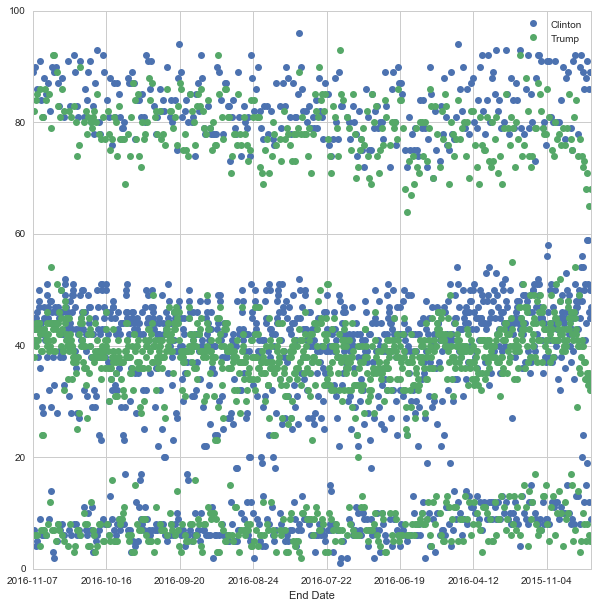

In [11]:
poll_df1.plot(x='End Date',y=['Clinton','Trump'],marker='o',linestyle='',figsize=(10,10))

While this may give you a quick idea, go ahead and try creating a new DataFrame or editing poll_df to make a better visualization of the above idea!
To lead you along the right path for plotting, we'll go ahead and answer another question related to plotting the sentiment versus time. Let's go ahead and plot out the difference between Clinton and Trump and how it changes as time moves along. Remember from the last data project we used the datetime module to create timestamps, let's go ahead and use it now.

In [12]:
# For timestamps
from datetime import datetime

In [13]:
poll_df1['Difference']=(poll_df1.Clinton-poll_df1.Trump)/100

poll_df1.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.04
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.83
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.75
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.05
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1,-0.02


Great! Keep in mind that the Difference column is Clinton minus Trump, thus a positive difference indicates a leaning towards Clinton in the polls.
Now let's go ahead and see if we can visualize how this sentiment in difference changes over time. We will start by using groupby to group the polls by their start data and then sorting it by that Start Date.

In [14]:
poll_df1 = poll_df1.groupby('Start Date',as_index=False).mean()
poll_df1.head()

,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration,Difference
0,2015-05-19,1046.00,34.25,48.75,2.5,14.00,1.0,0.1450
1,2015-06-20,420.75,35.00,47.25,NaN,17.75,1.0,0.1225
2,2015-06-21,1005.00,34.00,51.00,3.0,12.00,1.0,0.1700
3,2015-06-26,890.00,36.75,57.00,6.0,0.00,1.0,0.2025
4,2015-07-09,499.25,35.25,49.50,NaN,16.00,1.0,0.1425


Great! Now plotting the Differencce versus time should be straight forward.

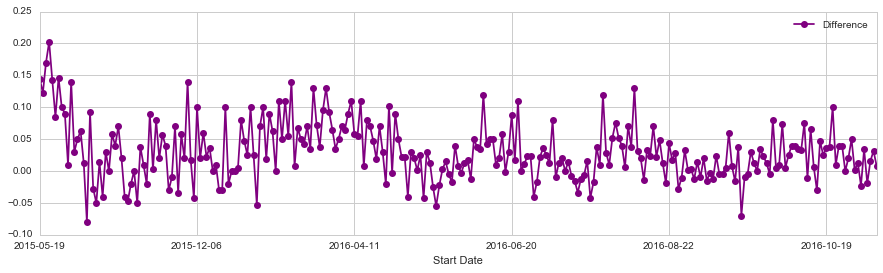

In [15]:
poll_df1.plot('Start Date','Difference',marker='o',figsize=(15,4),linestyle='-',color='purple')

It would be very interesting to plot marker lines on the dates of the debates and see if there is any general insight to the poll results.

In [16]:
row_in = 0
xlimit = []

for date in poll_df1['Start Date']:
    if date[0:7] == '2016-09' or date[0:7] == '2016-10':
        xlimit.append(row_in)
        row_in += 1
    else:
        row_in += 1
        
t1 = min(xlimit)
t2 = max(xlimit)

print t1
print t2

209
262


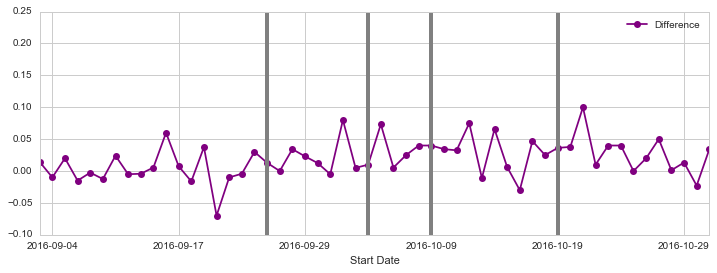

In [17]:
poll_df1.plot('Start Date','Difference',figsize=(12,4),linestyle='-',xlim=(t1,t2),marker='o',color='purple')

plt.axvline(x=212+15,linewidth=4,color='grey')
plt.axvline(x=212+23,linewidth=4,color='grey')
plt.axvline(x=212+28,linewidth=4,color='grey')
plt.axvline(x=212+38,linewidth=4,color='grey')

These polls reflect a rise for Clinton after the second debate against Trump, as memory serves she performed better than Trump during the second debate.

For all these polls it is important to remeber how geographical location can effect the value of a poll in predicting the outcomes of a national election. 

# Donor Data Set

Let's go ahead and switch gears and take a look at a data set consisting of information on donations to the federal campaign. 

The questions we will be trying to answer while looking at this Data Set is:

    1.) How much was donated and what was the average donation?
    2.) How did the donations differ between candidates?
    3.) How did the donations differ between Democrats and Republicans?
    4.) What were the demographics of the donors?
    5.) Is there a pattern to donation amounts?

In [18]:
donor_df = pd.read_csv('Election_Donor_Data_2016.csv',low_memory=False)

In [19]:
donor_df = donor_df.drop('election_tp',axis=1)

In [20]:
donor_df.columns = ['cand_id','cand_nm','contbr_nm','contbr_city','contbr_st','contbr_zip','contbr_employer',
 'contbr_occupation','contb_receipt_amt','contb_receipt_dt','receipt_desc','memo_cd','memo_text','form_tp','file_num',
                    'tran_id','election_tp']

donor_df.head()

,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
C00458844,P60006723,"Rubio, Marco","BLUM, MAUREEN",WASHINGTON,20,DC,STRATEGIC COALITIONS & INITIATIVES LL,OUTREACH DIRECTOR,175.0,15-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1152124,P2016
C00458844,P60006723,"Rubio, Marco","DODSON, MARK B. MR.",ATLANTA,30,GA,MORTGAGE CAPITAL ADVISORS,PRIVATE MORTGAGE BANKING,25.0,16-MAR-16,NaN,NaN,DEBT RETIREMENT,SA17A,1082559,SA17.1153048,P2016
C00458844,P60006723,"Rubio, Marco","CHILDERS, WILLIAM",DPO,AE,098309998,DIPLOMAT,US GOVERNMENT,100.0,20-FEB-16,NaN,NaN,NaN,SA17A,1056862,SA17.1020839,P2016
C00458844,P60006723,"Rubio, Marco","DOHERTY, THERESA",APO,AE,097520002,DODEA/DS,TEACHER,500.0,26-JUN-15,NaN,NaN,NaN,SA17A,1029436,SA17.769700,P2016
C00458844,P60006723,"Rubio, Marco","RUCINSKI, ROBERT",APO,AE,090960009,US ARMY,PHYSICIAN,200.0,10-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1078677,P2016


What might be interesting to do is get a quick glimpse of the donation amounts, and the average donation amount. Let's go ahead and break down the data.

In [21]:
donor_df['contb_receipt_amt'].value_counts().head(10)

50.0     644916
25.0     594452
100.0    534181
10.0     431590
27.0     305148
15.0     268712
5.0      267379
250.0    179413
35.0     144035
20.0     104267
Name: contb_receipt_amt, dtype: int64

In [22]:
don_mean = donor_df['contb_receipt_amt'].mean()

don_std = donor_df['contb_receipt_amt'].std()

print "The average donated amount is %.2f with std of %.2f " %(don_mean,don_std)

The average donated amount is 126.30 with std of 7817.19 


In [23]:
top_donor = donor_df['contb_receipt_amt'].copy()

top_donor.sort_values(inplace=True)

top_donor.head(10)

C00577130   -93308.0
C00580100   -84236.8
C00575795   -20000.0
C00573519   -18100.0
C00574624   -16600.0
C00573519   -16300.0
C00574624   -13500.0
C00573519   -13000.0
C00573519   -12242.0
C00577130   -12000.0
Name: contb_receipt_amt, dtype: float64

In [24]:
top_donor = top_donor[top_donor>0]

top_donor.value_counts().head(20)

50.0      644916
25.0      594452
100.0     534181
10.0      431590
27.0      305148
15.0      268712
5.0       267379
250.0     179413
35.0      144035
20.0      104267
500.0      81018
2700.0     71386
40.0       69128
19.0       65823
200.0      61075
1000.0     58985
3.0        58201
28.0       53865
8.0        53689
75.0       49240
Name: contb_receipt_amt, dtype: int64

Here we can see that the top 10 most common donations ranged from 10 to 2700 dollars.
A quick question we could verify is if donations are usually made in round number amounts? (e.g. 10,20,50,100,500 etc.) We can quickly visualize this by making a histogram and checking for peaks at those values. Let's go ahead and do this for the most common amounts, up to 3000 dollars.

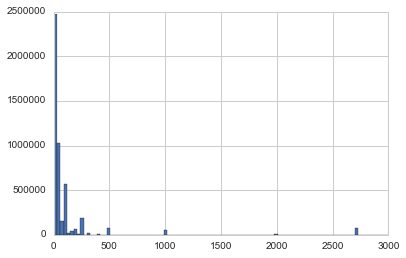

In [25]:
com_don = top_donor[top_donor<3000]

com_don.hist(bins=100)

Looks like our intuition was right, since we spikes at the round numbers.
Let's dive deeper into the data and see if we can seperate donations by Party, in order to do this we'll have to figure out a way of creating a new 'Party' column. We can do this by starting with the candidates and their affliliation. Now let's go ahead and get a list of candidates

In [26]:
donor_df.head()

,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
C00458844,P60006723,"Rubio, Marco","BLUM, MAUREEN",WASHINGTON,20,DC,STRATEGIC COALITIONS & INITIATIVES LL,OUTREACH DIRECTOR,175.0,15-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1152124,P2016
C00458844,P60006723,"Rubio, Marco","DODSON, MARK B. MR.",ATLANTA,30,GA,MORTGAGE CAPITAL ADVISORS,PRIVATE MORTGAGE BANKING,25.0,16-MAR-16,NaN,NaN,DEBT RETIREMENT,SA17A,1082559,SA17.1153048,P2016
C00458844,P60006723,"Rubio, Marco","CHILDERS, WILLIAM",DPO,AE,098309998,DIPLOMAT,US GOVERNMENT,100.0,20-FEB-16,NaN,NaN,NaN,SA17A,1056862,SA17.1020839,P2016
C00458844,P60006723,"Rubio, Marco","DOHERTY, THERESA",APO,AE,097520002,DODEA/DS,TEACHER,500.0,26-JUN-15,NaN,NaN,NaN,SA17A,1029436,SA17.769700,P2016
C00458844,P60006723,"Rubio, Marco","RUCINSKI, ROBERT",APO,AE,090960009,US ARMY,PHYSICIAN,200.0,10-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1078677,P2016


In [27]:
candidates = donor_df.cand_nm.unique()

candidates

array(['Rubio, Marco', 'Santorum, Richard J.', 'Perry, James R. (Rick)',
       'Carson, Benjamin S.', "Cruz, Rafael Edward 'Ted'", 'Paul, Rand',
       'Clinton, Hillary Rodham', 'Sanders, Bernard', 'Fiorina, Carly',
       'Huckabee, Mike', 'Pataki, George E.', "O'Malley, Martin Joseph",
       'Graham, Lindsey O.', 'Bush, Jeb', 'Trump, Donald J.',
       'Jindal, Bobby', 'Christie, Christopher J.', 'Walker, Scott',
       'Stein, Jill', 'Webb, James Henry Jr.', 'Kasich, John R.',
       'Gilmore, James S III', 'Lessig, Lawrence', 'Johnson, Gary'], dtype=object)

Let's go ahead and seperate Democrats from the Republican Candidates by adding a Party Affiliation column. We can do this by using map along a dictionary of party affiliations.

In [28]:
party_map = {'Lessig, Lawrence':'Democrat',
             'Clinton, Hillary Rodham':'Democrat',
             "O'Malley, Martin Joseph": 'Democrat',
             'Sanders, Bernard': 'Democrat',
             'Webb, James Henry Jr.': 'Democrat',
             'Rubio, Marco': 'Republican',
           'Santorum, Richard J.': 'Republican',
           'Perry, James R. (Rick)': 'Republican',
           'Carson, Benjamin S.': 'Republican',
           "Cruz, Rafael Edward 'Ted'": 'Republican',
           'Paul, Rand': 'Republican','Pataki, George E.': 'Republican',
           'Fiorina, Carly': 'Republican',
           'Huckabee, Mike': 'Republican',
           'Graham, Lindsey O.': 'Republican',
           'Bush, Jeb': 'Republican',
           'Trump, Donald J.': 'Republican',
            'Jindal, Bobby': 'Republican',
            'Christie, Christopher J.':'Republican',
            'Walker, Scott':'Republican',
            'Stein, Jill': 'Republican',
            'Kasich, John R.':'Republican',
            'Gilmore, James S III':'Republican',
            'Johnson, Gary':'Republican'}

donor_df['party'] = donor_df['cand_nm'].map(party_map)

donor_df.head()

,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp,party
C00458844,P60006723,"Rubio, Marco","BLUM, MAUREEN",WASHINGTON,20,DC,STRATEGIC COALITIONS & INITIATIVES LL,OUTREACH DIRECTOR,175.0,15-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1152124,P2016,Republican
C00458844,P60006723,"Rubio, Marco","DODSON, MARK B. MR.",ATLANTA,30,GA,MORTGAGE CAPITAL ADVISORS,PRIVATE MORTGAGE BANKING,25.0,16-MAR-16,NaN,NaN,DEBT RETIREMENT,SA17A,1082559,SA17.1153048,P2016,Republican
C00458844,P60006723,"Rubio, Marco","CHILDERS, WILLIAM",DPO,AE,098309998,DIPLOMAT,US GOVERNMENT,100.0,20-FEB-16,NaN,NaN,NaN,SA17A,1056862,SA17.1020839,P2016,Republican
C00458844,P60006723,"Rubio, Marco","DOHERTY, THERESA",APO,AE,097520002,DODEA/DS,TEACHER,500.0,26-JUN-15,NaN,NaN,NaN,SA17A,1029436,SA17.769700,P2016,Republican
C00458844,P60006723,"Rubio, Marco","RUCINSKI, ROBERT",APO,AE,090960009,US ARMY,PHYSICIAN,200.0,10-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1078677,P2016,Republican


Let's look at our DataFrame and also make sure we clear refunds from the contribution amounts.

In [29]:
donor_df = donor_df[donor_df.contb_receipt_amt>0]

donor_df.head()

,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp,party
C00458844,P60006723,"Rubio, Marco","BLUM, MAUREEN",WASHINGTON,20,DC,STRATEGIC COALITIONS & INITIATIVES LL,OUTREACH DIRECTOR,175.0,15-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1152124,P2016,Republican
C00458844,P60006723,"Rubio, Marco","DODSON, MARK B. MR.",ATLANTA,30,GA,MORTGAGE CAPITAL ADVISORS,PRIVATE MORTGAGE BANKING,25.0,16-MAR-16,NaN,NaN,DEBT RETIREMENT,SA17A,1082559,SA17.1153048,P2016,Republican
C00458844,P60006723,"Rubio, Marco","CHILDERS, WILLIAM",DPO,AE,098309998,DIPLOMAT,US GOVERNMENT,100.0,20-FEB-16,NaN,NaN,NaN,SA17A,1056862,SA17.1020839,P2016,Republican
C00458844,P60006723,"Rubio, Marco","DOHERTY, THERESA",APO,AE,097520002,DODEA/DS,TEACHER,500.0,26-JUN-15,NaN,NaN,NaN,SA17A,1029436,SA17.769700,P2016,Republican
C00458844,P60006723,"Rubio, Marco","RUCINSKI, ROBERT",APO,AE,090960009,US ARMY,PHYSICIAN,200.0,10-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1078677,P2016,Republican


Let's start by aggregating the data by candidate. We'll take a quick look a the total amounts received by each candidate. First we will look a the total number of donations and then at the total amount.

In [30]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bush, Jeb                      28038
Carson, Benjamin S.           244904
Christie, Christopher J.        5836
Clinton, Hillary Rodham      1426644
Cruz, Rafael Edward 'Ted'     541088
Fiorina, Carly                 27536
Gilmore, James S III              79
Graham, Lindsey O.              3925
Huckabee, Mike                  6359
Jindal, Bobby                    761
Johnson, Gary                   2473
Kasich, John R.                25210
Lessig, Lawrence                1337
O'Malley, Martin Joseph         5194
Pataki, George E.                343
Paul, Rand                     32078
Perry, James R. (Rick)           875
Rubio, Marco                   99258
Sanders, Bernard             2045356
Santorum, Richard J.            1658
Stein, Jill                     2792
Trump, Donald J.              318681
Walker, Scott                   6436
Webb, James Henry Jr.            800
Name: contb_receipt_amt, dtype: int64

Clearly Clinton is the front-runner in number of people donating.

In [31]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bush, Jeb                    3.377373e+07
Carson, Benjamin S.          2.901400e+07
Christie, Christopher J.     8.213720e+06
Clinton, Hillary Rodham      2.869153e+08
Cruz, Rafael Edward 'Ted'    6.975275e+07
Fiorina, Carly               6.693845e+06
Gilmore, James S III         1.015107e+05
Graham, Lindsey O.           4.630162e+06
Huckabee, Mike               2.498978e+06
Jindal, Bobby                1.275393e+06
Johnson, Gary                1.243503e+06
Kasich, John R.              1.475258e+07
Lessig, Lawrence             6.242195e+05
O'Malley, Martin Joseph      4.057502e+06
Pataki, George E.            5.073494e+05
Paul, Rand                   6.271873e+06
Perry, James R. (Rick)       1.189868e+06
Rubio, Marco                 4.054158e+07
Sanders, Bernard             9.752034e+07
Santorum, Richard J.         1.130000e+06
Stein, Jill                  5.083337e+05
Trump, Donald J.             3.946628e+07
Walker, Scott                6.442345e+06
Webb, James Henry Jr.     

In [32]:
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

i = 0

for don in cand_amount:
    print 'The candidate %s raised %.0f dollors ' %(cand_amount.index[i],don)
    print '\n'
    
    i += 1

The candidate Bush, Jeb raised 33773733 dollors 


The candidate Carson, Benjamin S. raised 29014000 dollors 


The candidate Christie, Christopher J. raised 8213720 dollors 


The candidate Clinton, Hillary Rodham raised 286915344 dollors 


The candidate Cruz, Rafael Edward 'Ted' raised 69752747 dollors 


The candidate Fiorina, Carly raised 6693845 dollors 


The candidate Gilmore, James S III raised 101511 dollors 


The candidate Graham, Lindsey O. raised 4630162 dollors 


The candidate Huckabee, Mike raised 2498978 dollors 


The candidate Jindal, Bobby raised 1275393 dollors 


The candidate Johnson, Gary raised 1243503 dollors 


The candidate Kasich, John R. raised 14752578 dollors 


The candidate Lessig, Lawrence raised 624220 dollors 


The candidate O'Malley, Martin Joseph raised 4057502 dollors 


The candidate Pataki, George E. raised 507349 dollors 


The candidate Paul, Rand raised 6271873 dollors 


The candidate Perry, James R. (Rick) raised 1189868 dollors 


The c

How about just a quick graphic presentation?

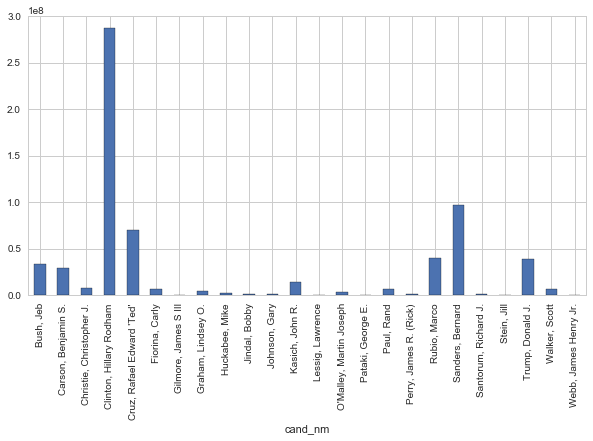

In [33]:
cand_amount.plot(kind='bar',figsize=(10,5))

Now the comparison is very easy to see. As we saw berfore, clearly Clinton is the front-runner in donation amounts.

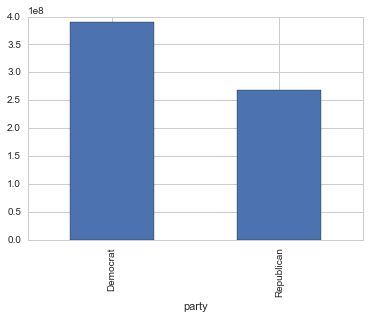

In [34]:
party_amount = donor_df.groupby('party')['contb_receipt_amt'].sum()

party_amount.plot(kind='bar')

Looks like Democrats have received more donation compared to Republicans.

Finally to start closing out the project, let's look at donations and who they came from (as far as occupation is concerned). We will start by grabing the occupation information from the dono_df DataFrame and then using pivot_table to make the index defined by the various occupations and then have the columns defined by the Party (Republican or Democrat). FInally we'll also pass an aggregation function in the pivot table, in this case a simple sum function will add up all the comntributions by anyone with the same profession.

In [35]:
occupation_df = donor_df.pivot_table('contb_receipt_amt',
                                       index='contbr_occupation',
                                       columns='party', aggfunc='sum')

occupation_df.head()

party,Democrat,Republican
contbr_occupation,,
ADMINISTRATIVE ASSISTANT,150.0,NaN
ARTIST,100.0,NaN
CAREER ADVISOR,50.0,NaN
CHARITY CONSULTANT,250.0,NaN
"CONSULTANT, BUSINESS OWNER",350.0,NaN


In [36]:
occupation_df.shape

(92921, 2)

In [37]:
occupation_df = occupation_df[occupation_df.sum(axis=1) > 1000000]

occupation_df.shape

(59, 2)

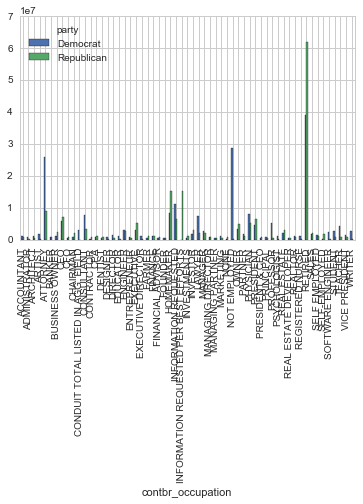

In [38]:
occupation_df.plot(kind='bar')

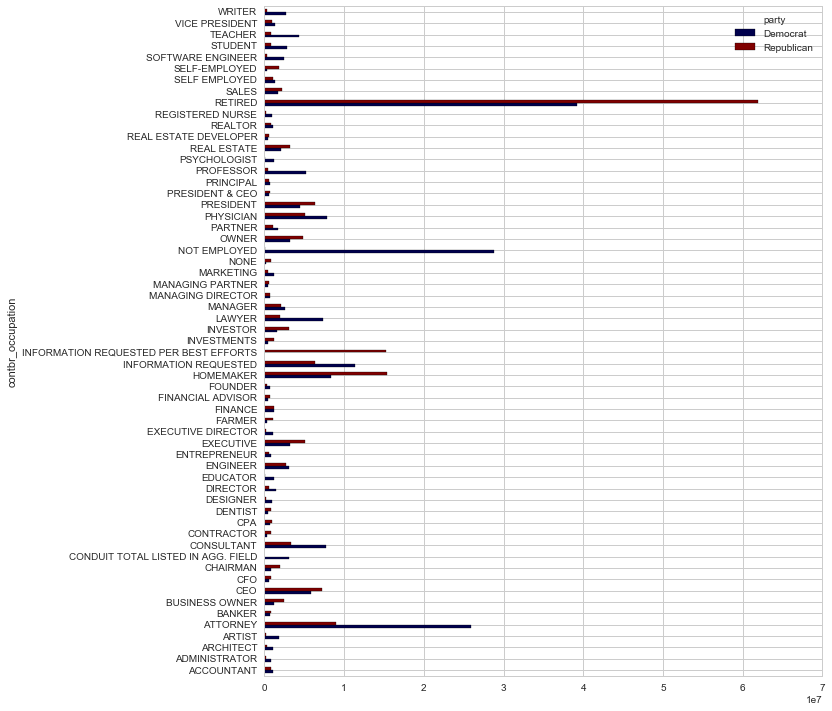

In [39]:
occupation_df.plot(kind='barh',figsize=(10,12),cmap='seismic')

In [40]:
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED','NONE'],axis=0,inplace=True)

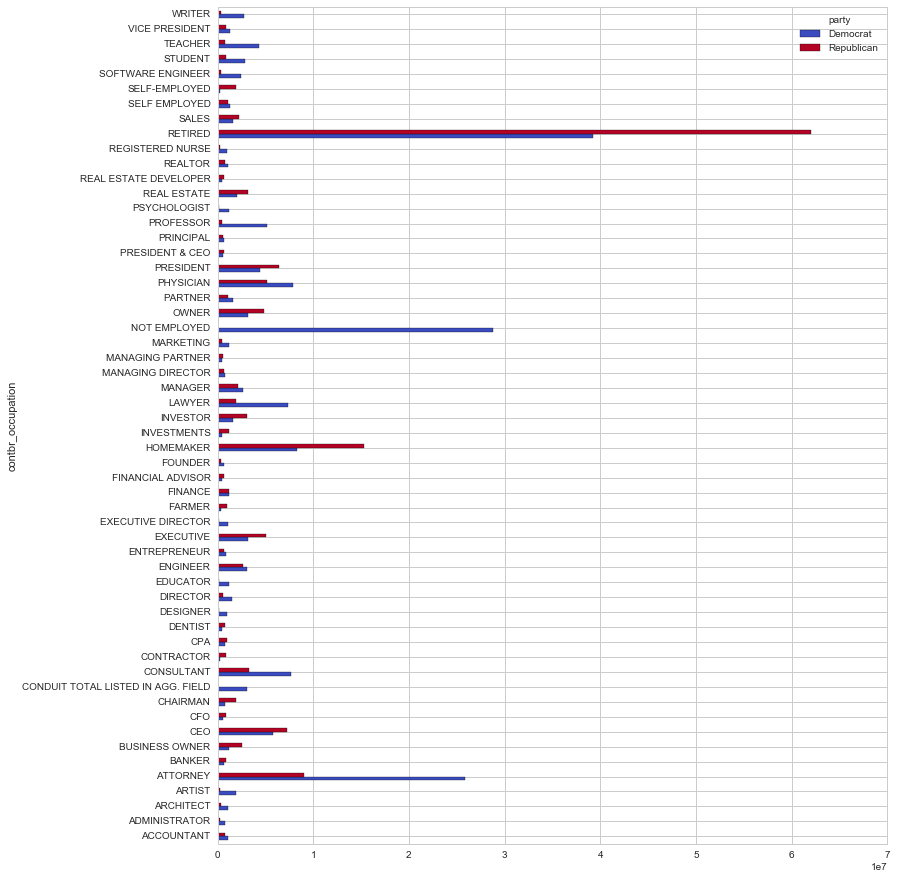

In [41]:
occupation_df.plot(kind='barh',figsize=(12,15),cmap='coolwarm')

This figre shows the distribution of the parties that different occupations have voted to.